# NLA Assignment 5 - Scott Sanders - Spring 2021

## Singular Spectrum Analysis (SSA)
A decomposition and forecasting method applied to time series data.

Example code - https://pyts.readthedocs.io/en/stable/auto_examples/decomposition/plot_ssa.html

Further reading - https://www.mdpi.com/1099-4300/22/1/83/htm

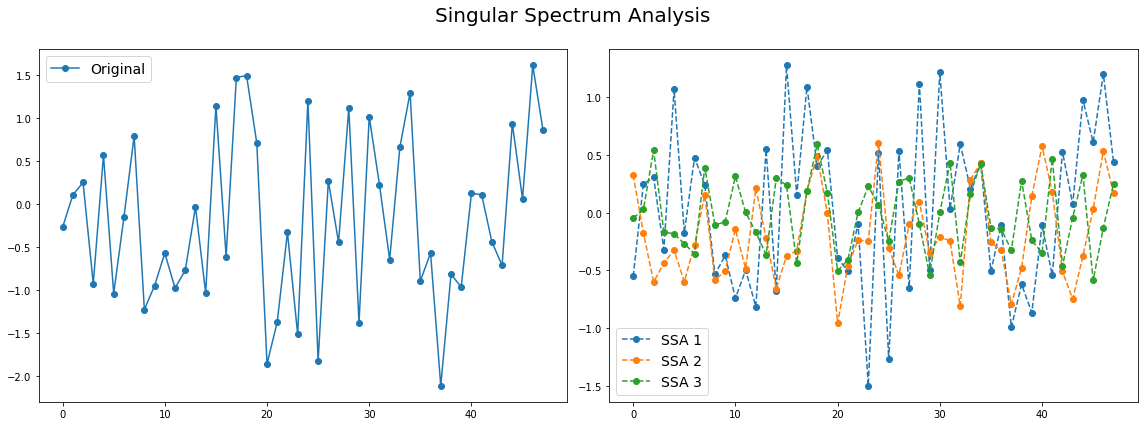

In [1]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis

# Parameters
n_samples, n_timestamps = 1, 48

# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

# We decompose the time series into three subseries
window_size = 15
groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

# Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=15, groups=groups)
X_ssa = ssa.fit_transform(X)

# Show the results for the first time series and its subseries
plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(X[0], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)):
    ax2.plot(X_ssa[i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# The first subseries consists of the trend of the original time series.
# The second and third subseries consist of noise.

### Task
The example above uses a predefined SSA function. We seek to implement SSA natively using scipy.linalg.svd instead of the command shown in the example code above.

### Background

SSA combines elements of classical time series analysis, multivariate statistics, multivariate geometry, dynamical systems and signal processing. SSA aims at decomposing the original series into
a sum of a small number of interpretable components such as a slowly varying trend, oscillatory
components and a ‘structureless’ noise. It is based on the singular-value decomposition of a
specific matrix constructed upon time series. Neither a parametric model nor stationarity-type
conditions have to be assumed for the time series; this makes SSA a model-free technique. [cite cardiff]

The SSA methodology for model fit can be summarized in four steps: (i) embedding, which maps the original univariate time series into a trajectory matrix; (ii) singular value decomposition (SVD), which helps decomposing the trajectory matrix into the sum of rank-one matrices; (iii) eigentriple grouping, which helps deciding which of the components are associated to the signal and which are associated to the noise; and (iv) diagonal averaging, which maps the rank-one matrices, associated to the signal, back to time series that can be interpreted as trend, seasonal, or other meaningful components. [cite entropy]

In the first stage, the (univariate) time series is converted into a high-dimensional matrix called a trajectory matrix, which is then decomposed into the sum of rank-one matrices based on the SVD. The embedding step is achieved by mapping the original time series into a sequence of K vectors with length L. Also known as a Hankel Matrix, a trajectory matrix has constants on every left-diagonal. Trajectory matrix $A$ can be written as:

$$A =  
\begin{bmatrix}
a_1 & a_2 & a_3 & a_4 & a_5 \\
a_2 & a_3 & a_4 & a_5 & a_6 \\
a_3 & a_4 & a_5 & a_6 & a_7 \\
a_4 & a_5 & a_6 & a_7 & a_8  \\
a_5 & a_6 & a_7 & a_8 & a_9 \\
\end{bmatrix}$$

Next, we take the SVD of the trajectory matrix $X$ to get something of the form $$\sum_{i=1}^d X_i = \sum_{i=1}^d \sqrt(\lambda_i)U_iV_i^T$$ where $d$ is the rank of $X$.

### Implementation

In [2]:
## Create a random sample time series
# Parameters
n_samples, n_timestamps = 100, 48

# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

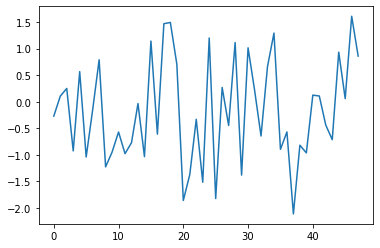

In [3]:
testSeries = X[0]
testSeries
plt.plot(testSeries)

In [4]:
import scipy
from scipy import linalg
from scipy.linalg import hankel

# Embed time series data into a Hankel matrix

embed = scipy.linalg.hankel(testSeries)
embed

array([[-0.27071232,  0.10484805,  0.25052782, ...,  0.05865553,
         1.60971428,  0.85990674],
       [ 0.10484805,  0.25052782, -0.92519997, ...,  1.60971428,
         0.85990674,  0.        ],
       [ 0.25052782, -0.92519997,  0.56714366, ...,  0.85990674,
         0.        ,  0.        ],
       ...,
       [ 0.05865553,  1.60971428,  0.85990674, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.60971428,  0.85990674,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85990674,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [5]:
# Decompose Hankel matrix
U, s, Vt = linalg.svd(embed)
U, s, Vt

(array([[ 2.37910947e-01, -9.74532857e-02, -2.06841509e-02, ...,
         -4.53810866e-03,  1.03080639e-02, -3.15998511e-16],
        [ 2.41175891e-01,  3.40460175e-02,  3.58596938e-02, ...,
          1.19130666e-02,  1.39783280e-03,  6.09660675e-16],
        [ 2.32397812e-01,  1.26785439e-01, -4.68980623e-02, ...,
          1.32167234e-03, -1.41086973e-02, -1.15108551e-15],
        ...,
        [ 5.27778733e-02, -1.45416457e-02,  1.72962646e-03, ...,
          4.85738262e-01,  2.50787139e-01,  1.92785417e-01],
        [ 5.17554806e-02,  1.17350428e-02, -2.62883551e-04, ...,
          7.12136686e-02, -4.81035073e-01, -4.12893094e-01],
        [ 1.79352361e-02,  7.70720669e-03, -1.90104077e-03, ...,
         -9.45540130e-02, -2.39610665e-01,  8.84302920e-01]]),
 array([1.14066649e+01, 1.08730362e+01, 9.35615959e+00, 9.27988043e+00,
        8.76387750e+00, 8.19580258e+00, 8.10697196e+00, 7.36948012e+00,
        6.74874213e+00, 6.73302061e+00, 6.47551069e+00, 6.41569586e+00,
        6.030

In [6]:
# Take nuclear norm with a given confidence level α to distinguish signal from noise

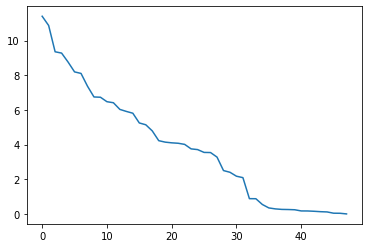

In [7]:
plt.plot(s)

In [8]:
α = 0.60
NuclearNormLevels = np.cumsum( s )/sum(s)
r = np.searchsorted(NuclearNormLevels, α )
r, NuclearNormLevels

(13,
 array([0.06174437, 0.1206002 , 0.17124517, 0.22147723, 0.26891617,
        0.31328012, 0.35716322, 0.39705428, 0.43358527, 0.47003117,
        0.50508316, 0.53981137, 0.57245307, 0.60446685, 0.63591833,
        0.66432985, 0.69217508, 0.71811006, 0.74098928, 0.76341067,
        0.78561488, 0.80768615, 0.82940905, 0.84972399, 0.86981797,
        0.88903012, 0.90819857, 0.92594727, 0.93948952, 0.95249519,
        0.96427552, 0.97560453, 0.98037248, 0.985119  , 0.98806431,
        0.98993756, 0.99150702, 0.99291848, 0.99428965, 0.99558981,
        0.99652071, 0.99743842, 0.99826188, 0.9989575 , 0.99957635,
        0.99979976, 1.        , 1.        ]))

In [9]:
# We will use the r singular values to reconstruct the signal and the others to construct the noise

In [10]:
Σᵣ = np.diag(s[:r]) 
Br_sig = U[:,:r] @ Σᵣ @ Vt[:r]

In [11]:
Br_sig.shape

(48, 48)

In [12]:
Σᵣ2 = np.diag(s[r:]) 
Br_noise = U[:,r:] @ Σᵣ2 @ Vt[r:]

In [13]:
# Convert Hankel matrix back into time series using anti-diagonal averaging

In [14]:
def antiDiagAvg(mat, shape):
    mat2 = np.fliplr(mat)
    output = []
    for i in range(0,int(shape)):
        output.append(np.sum(np.diagonal(mat2, offset = i)/len(np.diagonal(mat2, offset = i))))
    return np.flip(output)

In [15]:
signal = antiDiagAvg(Br_sig, 48)
noise = antiDiagAvg(Br_noise, 48)

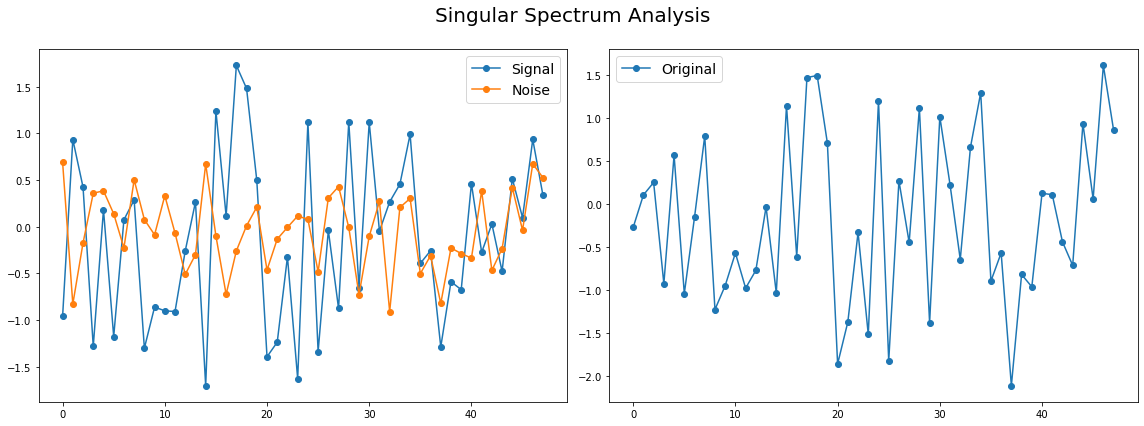

In [16]:
# Show the results for the first time series and its subseries
plt.figure(figsize=(16, 6))

ax1 = plt.subplot(122)
ax1.plot(testSeries, 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(121)
ax2.plot(signal, 'o-', label='Signal')
ax2.plot(noise, 'o-', label='Noise')
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

In [17]:
# SNR = signal to noise ratio, found outside application, independent of signal

(array([3., 2., 0., 0., 5., 0., 5., 4., 5., 4., 3., 3., 3., 4., 3., 1., 3.]),
 array([-0.91062887, -0.81636009, -0.72209131, -0.62782253, -0.53355376,
        -0.43928498, -0.3450162 , -0.25074742, -0.15647864, -0.06220987,
         0.03205891,  0.12632769,  0.22059647,  0.31486525,  0.40913402,
         0.5034028 ,  0.59767158,  0.69194036]),
 <BarContainer object of 17 artists>)

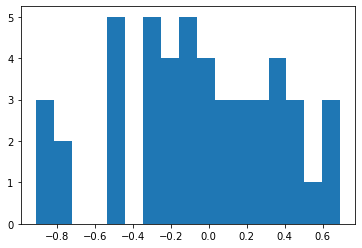

In [18]:
# Noise is Gaussian-ish
plt.hist(noise, bins = 17)

We get a smoothened signal and noise signal from this algorithm. Parameters can be adjusted for different types of data.

### Works Cited

@article{article,
author = {Hassani, Hossein},
year = {2007},
month = {01},
pages = {},
title = {Singular Spectrum Analysis: Methodology and Comparison},
volume = {5},
journal = {University Library of Munich, Germany, MPRA Paper}
}